## Weekly trends plot for different years
* resampling frequency is 9 Days
* various rates of the chlor-a concentration
* "fixed scale" seems more illustrative than the "min-max scale"

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime

In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load CSV output    
#plt = plt.figure(8,6)
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()

freq = 9
pref = 'df_chl_dist_out_'
surf =  '_modisa.csv'
infile = pref + str(freq) + 'D' + surf

folder = '../data_collector_modisa_chla9km/df_multidimInterpolation/'
direc = folder + infile
direc

print('in_filename and path:', direc)

df_tmp = pd.read_csv(direc, index_col='index')
df_tmp.sort_values(['id', 'time'])[:20]

in_filename and path: ../data_collector_modisa_chla9km/df_multidimInterpolation/df_chl_dist_out_9D_modisa.csv


,time,id,ve,vn,spd,lon,var_tmp,var_lon,var_lat,temp,...,chlor_a_log_e,chl_rate,chl_log_e_rate,chl_rate_stand,chl_log_e_rate_stand,chl_rate_week,chl_log_e_rate_week,week,week_rotate,dist
index,,,,,,,,,,,,,,,,,,,,,
1,2002-11-07,10206,-2.217083,2.990778,5.446583,67.132000,1000.000000,0.001535,0.000494,NaN,...,-2.033844,-0.000317,-0.002393,0.027988,0.006334,-0.002216,-0.016752,45,2,541.732456
260,2002-11-16,10206,-1.089083,0.501111,4.028889,67.029167,1000.000000,0.003872,0.001033,NaN,...,-1.937859,0.001464,0.010665,0.034427,0.205325,0.010251,0.074655,46,3,552.879000
519,2002-11-25,10206,-6.485944,2.996944,7.461361,66.854361,1000.000000,0.003371,0.000959,NaN,...,-1.966134,-0.000446,-0.003142,0.027520,-0.005072,-0.003123,-0.021992,48,5,572.051593
778,2002-12-04,10206,-13.622278,7.926417,15.784583,66.041389,1000.000000,0.010307,0.002453,NaN,...,-1.950322,0.000248,0.001757,0.030029,0.069576,0.001735,0.012298,49,6,662.772020
1037,2002-12-13,10206,-8.439500,5.790389,10.610000,65.245111,1000.000000,0.002369,0.000711,NaN,...,-2.043564,-0.001407,-0.010360,0.024046,-0.115074,-0.009848,-0.072522,50,7,755.055576
1296,2002-12-22,10206,-9.425833,2.559389,10.393528,64.642194,1000.000000,0.003372,0.000940,NaN,...,-1.861759,0.002870,0.020201,0.039510,0.350636,0.020092,0.141404,51,8,825.341894
1555,2002-12-31,10206,-11.699944,-4.870667,13.154361,63.871028,1000.000000,0.001649,0.000537,NaN,...,-1.299605,0.013027,0.062462,0.076228,0.994641,0.091187,0.437231,1,11,906.214212
1814,2003-01-09,10206,-10.749444,-7.163222,13.588944,63.039583,1000.000000,0.002340,0.000740,NaN,...,-1.295328,0.000130,0.000475,0.029602,0.050045,0.000909,0.003326,2,12,926.169343
2073,2003-01-18,10206,-8.652389,-9.397000,13.033611,62.380750,1000.000000,0.003504,0.001006,NaN,...,-1.129756,0.005478,0.018397,0.048938,0.323149,0.038347,0.128778,3,13,863.693598


In [3]:
df_tmp['time'] = pd.to_datetime(df_tmp['time']) # ,format='%m/%d/%y %I:%M%p'
df_timed = df_tmp.set_index('time')
# add a new column to the dataset
df_timed['year'] = df_timed.index.year
df_timed[:20]

year_max = df_timed.index.year.max()
year_min = df_timed.index.year.min()
print('year_max', year_max)
print('year_min', year_min)
#print(df_timed)

year_max 2016
year_min 2002



 summary statistics of chl_rate_week for the year 2002 

count    43.000000
mean      0.017486
std       0.535821
min      -2.385148
25%      -0.010185
50%       0.006012
75%       0.040379
max       2.483033
Name: chl_rate_week, dtype: float64


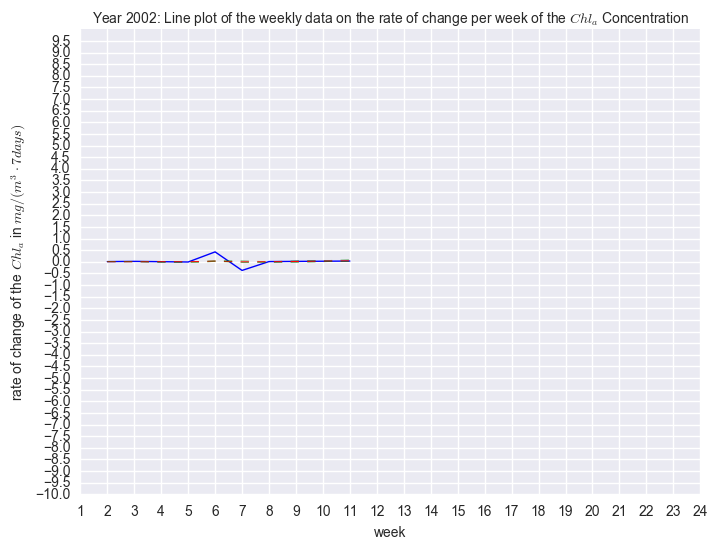

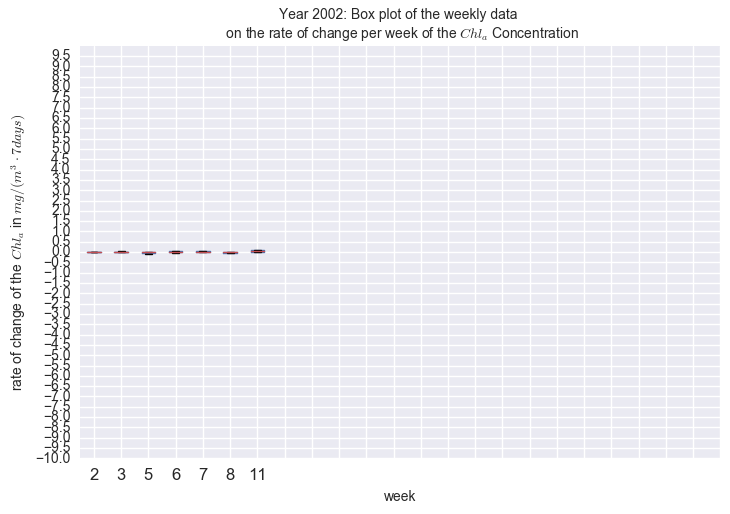


 summary statistics of chl_rate_week for the year 2003 

count    41.000000
mean     -0.013757
std       1.265036
min      -6.287008
25%      -0.074928
50%      -0.010010
75%       0.057369
max       4.001958
Name: chl_rate_week, dtype: float64


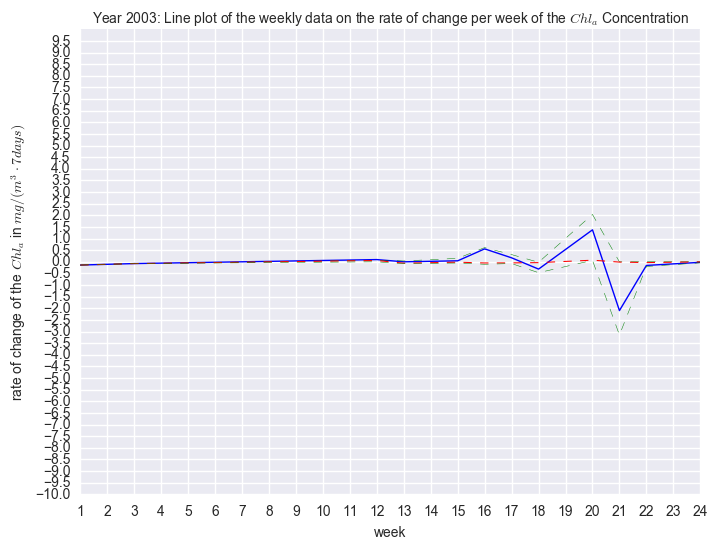

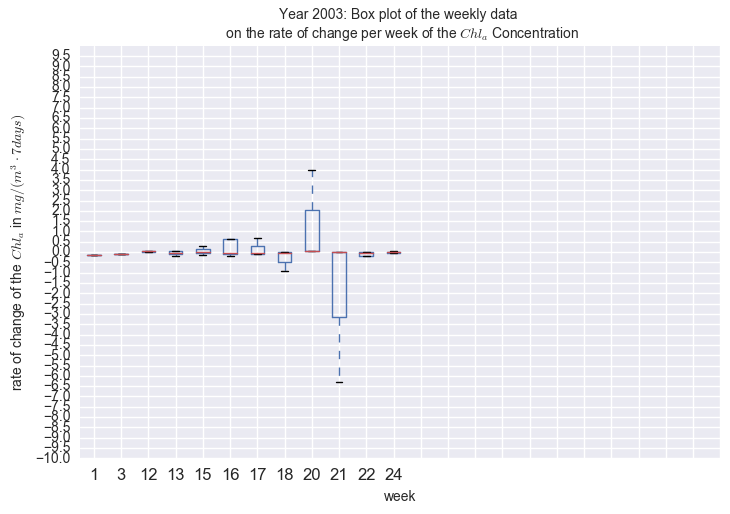


 summary statistics of chl_rate_week for the year 2004 

count    10.000000
mean      0.023244
std       0.046909
min      -0.021444
25%      -0.000577
50%       0.012516
75%       0.020922
max       0.147786
Name: chl_rate_week, dtype: float64


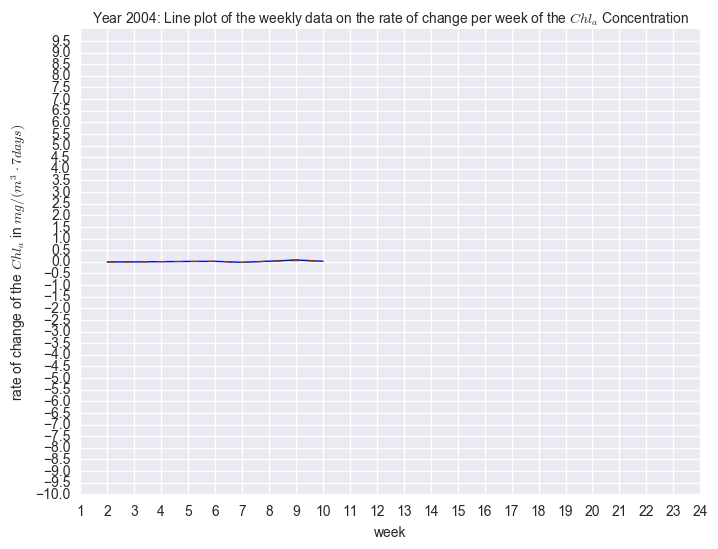

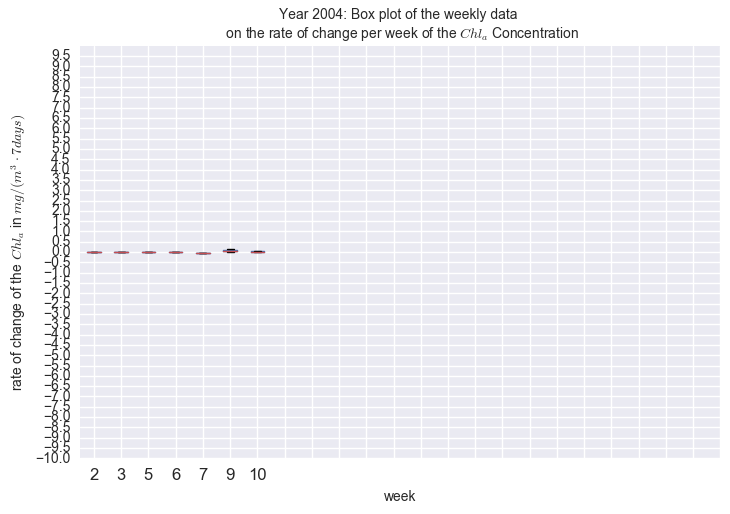


 summary statistics of chl_rate_week for the year 2005 

count    39.000000
mean      0.015951
std       0.063190
min      -0.132753
25%      -0.013200
50%       0.005757
75%       0.054574
max       0.143977
Name: chl_rate_week, dtype: float64


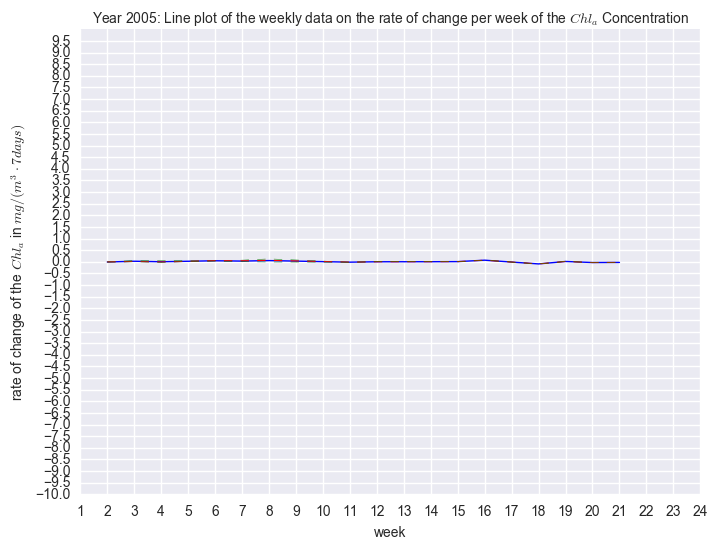

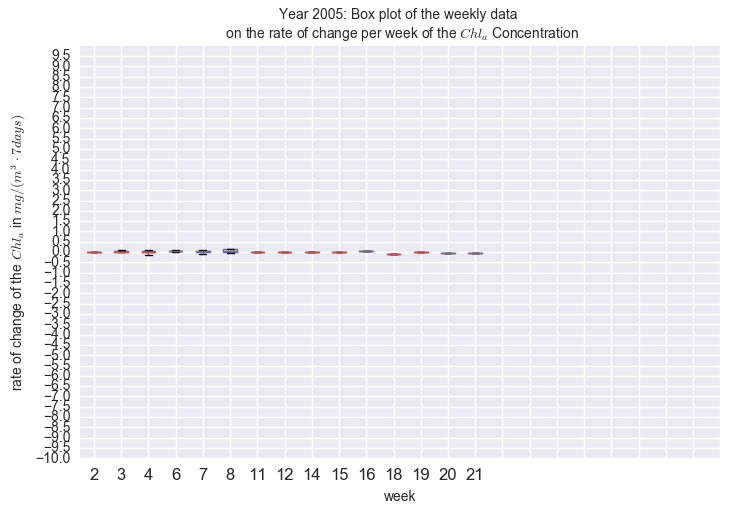


 summary statistics of chl_rate_week for the year 2006 

count    94.000000
mean     -0.005212
std       0.119570
min      -0.555586
25%      -0.035341
50%      -0.009463
75%       0.017695
max       0.380782
Name: chl_rate_week, dtype: float64


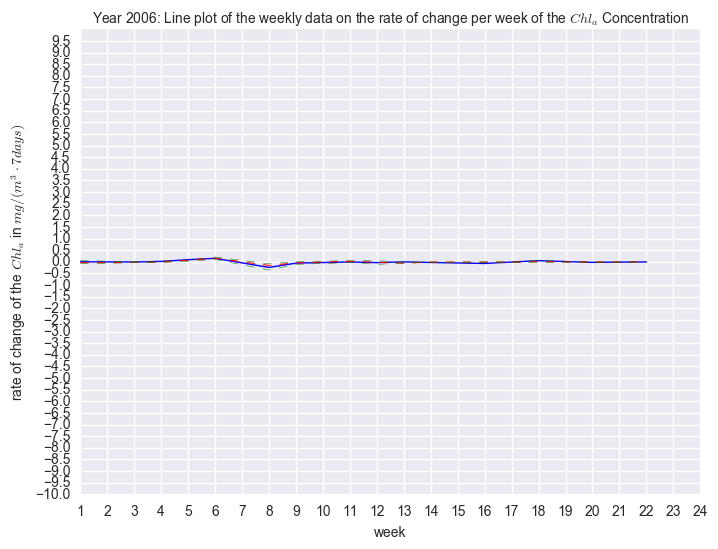

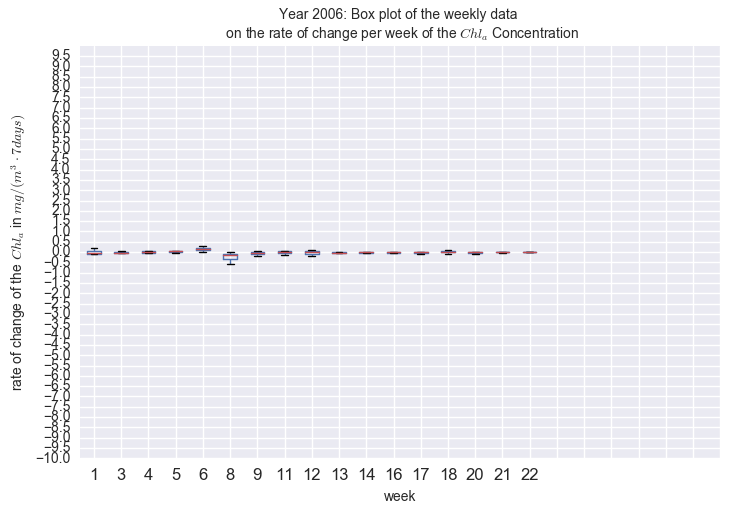


 summary statistics of chl_rate_week for the year 2007 

count    91.000000
mean      0.014355
std       0.096513
min      -0.274490
25%      -0.025433
50%       0.000219
75%       0.025393
max       0.402928
Name: chl_rate_week, dtype: float64


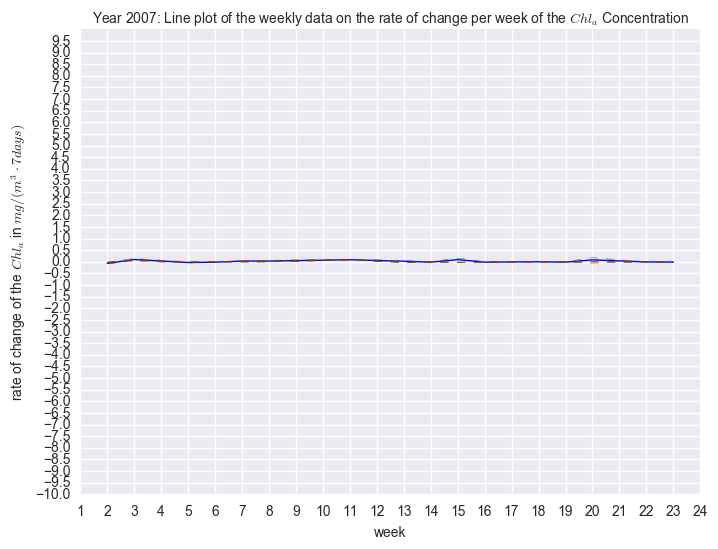

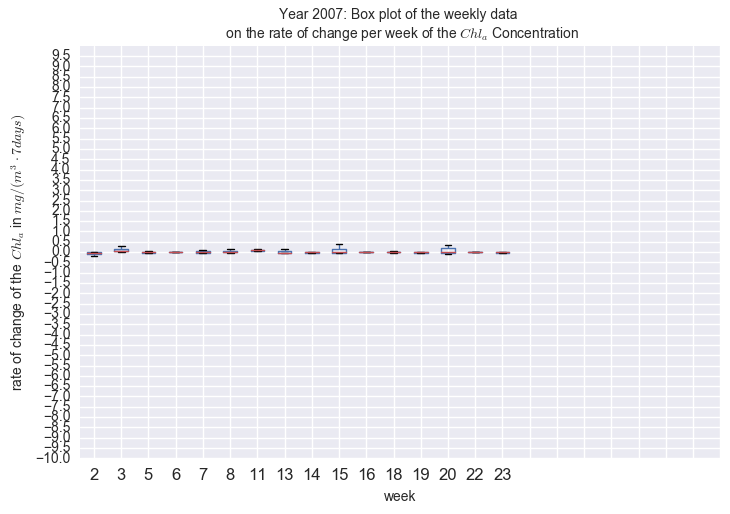


 summary statistics of chl_rate_week for the year 2008 

count    158.000000
mean      -0.368133
std        3.277096
min      -17.498772
25%       -0.039620
50%       -0.005944
75%        0.010823
max       16.932355
Name: chl_rate_week, dtype: float64


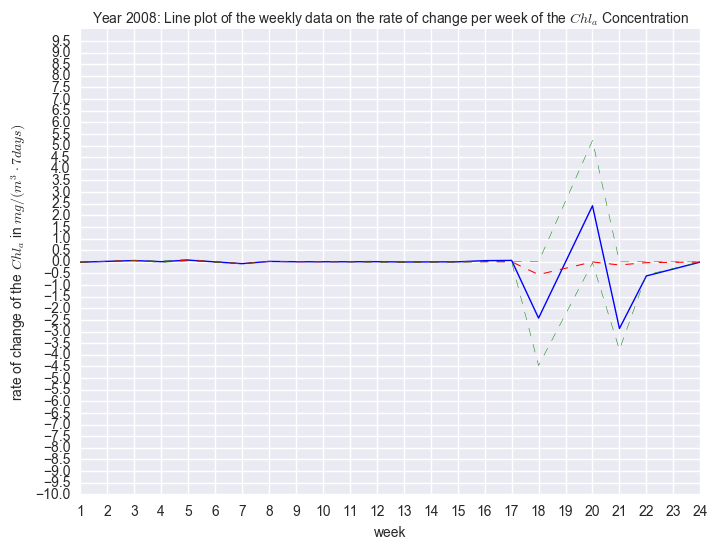

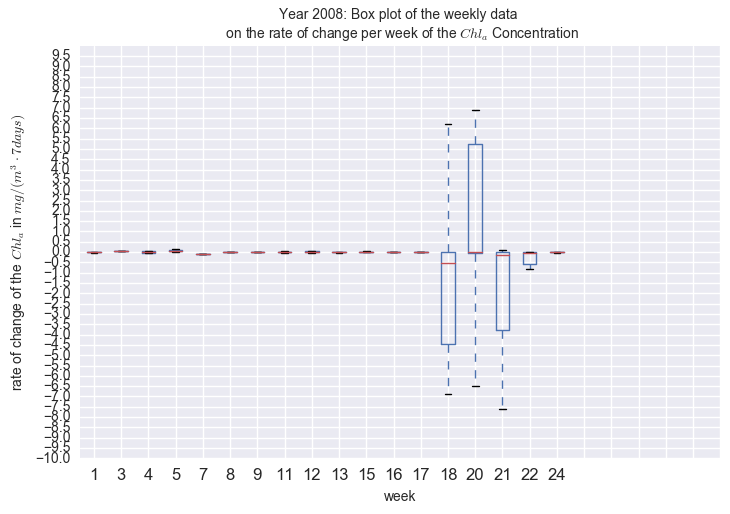


 summary statistics of chl_rate_week for the year 2009 

count    39.000000
mean     -0.022303
std       0.927306
min      -4.254792
25%      -0.020725
50%      -0.004834
75%       0.022635
max       3.769869
Name: chl_rate_week, dtype: float64


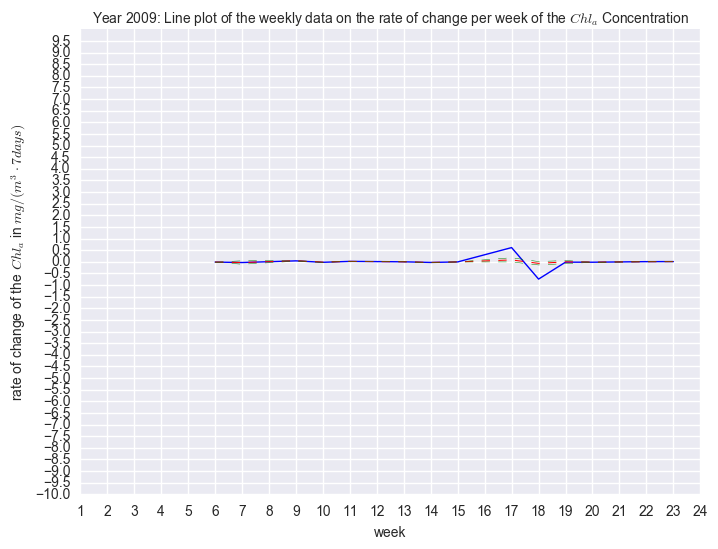

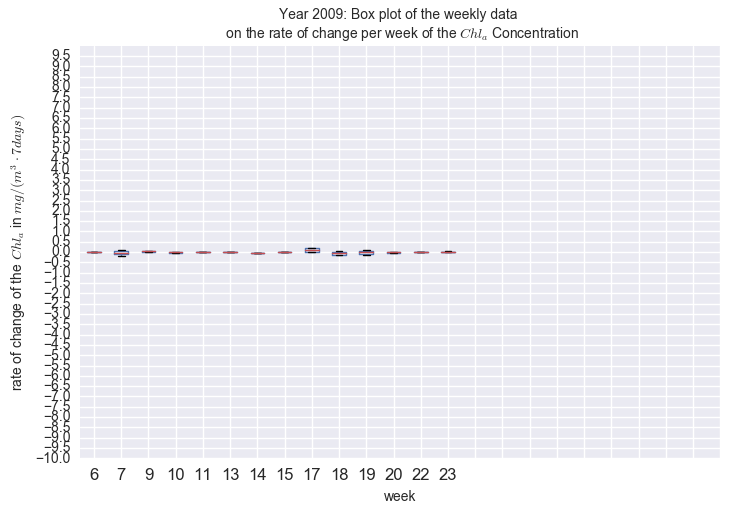


 summary statistics of chl_rate_week for the year 2010 

count    68.000000
mean     -0.011722
std       0.065056
min      -0.293733
25%      -0.035745
50%      -0.007775
75%       0.007199
max       0.210528
Name: chl_rate_week, dtype: float64


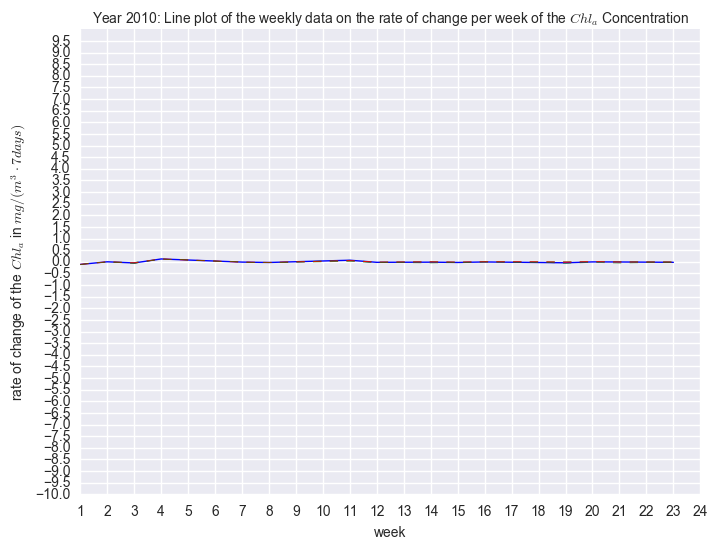

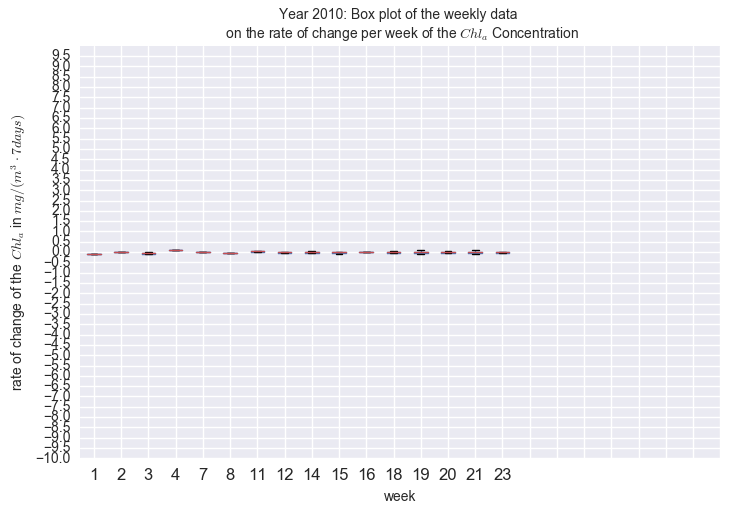


 summary statistics of chl_rate_week for the year 2011 

count    22.000000
mean      0.057291
std       0.270630
min      -0.405771
25%      -0.007396
50%       0.012539
75%       0.068024
max       1.132496
Name: chl_rate_week, dtype: float64


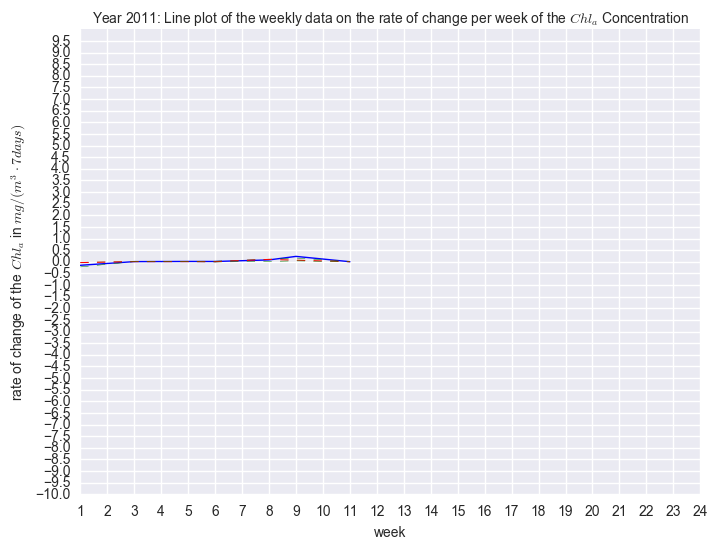

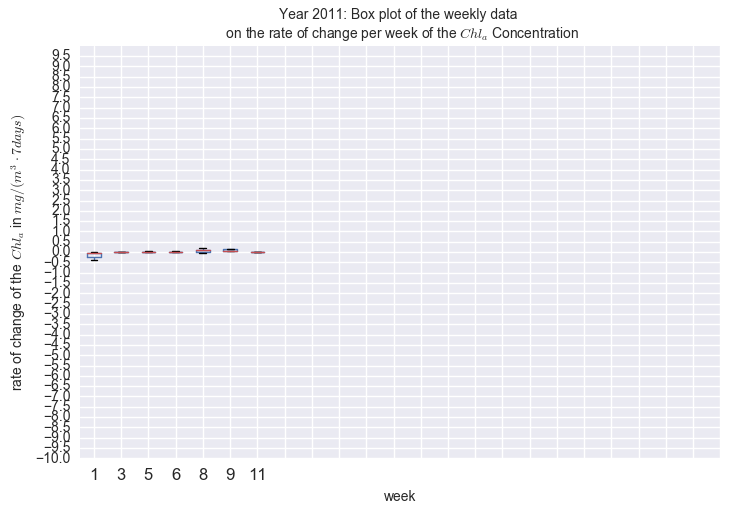


 summary statistics of chl_rate_week for the year 2012 

count    40.000000
mean     -0.033431
std       0.732965
min      -2.739659
25%      -0.153999
50%      -0.017052
75%       0.056450
max       2.829952
Name: chl_rate_week, dtype: float64


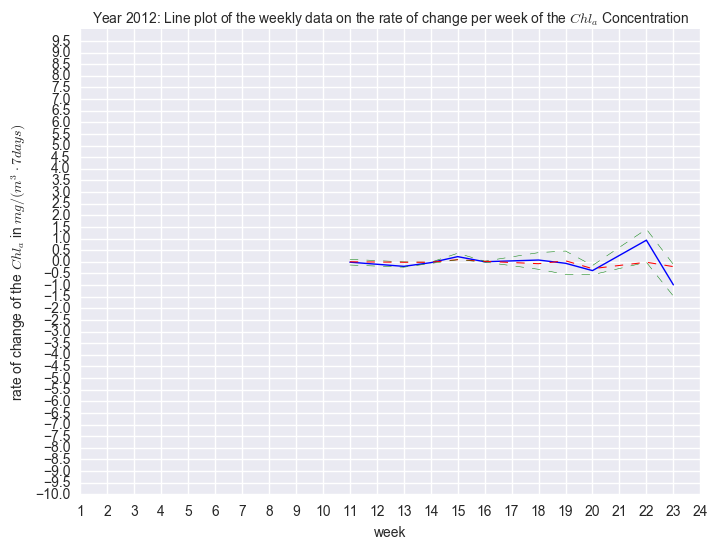

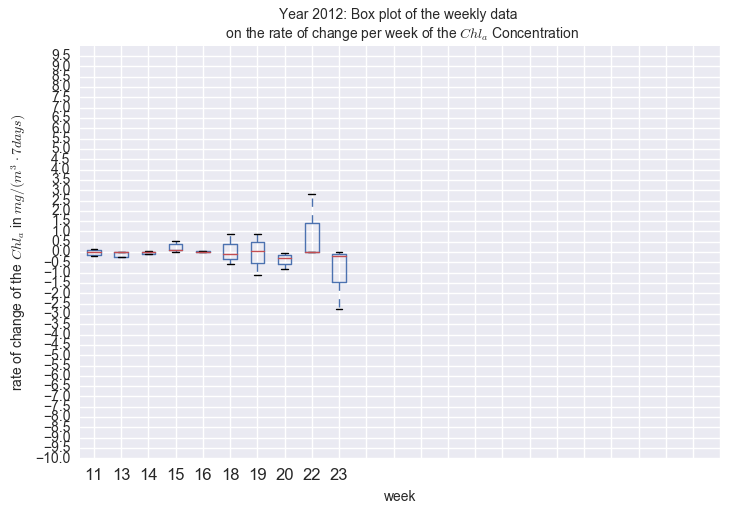


 summary statistics of chl_rate_week for the year 2013 

count    32.000000
mean      0.023232
std       0.524479
min      -1.930721
25%      -0.040974
50%       0.001816
75%       0.054816
max       2.154222
Name: chl_rate_week, dtype: float64


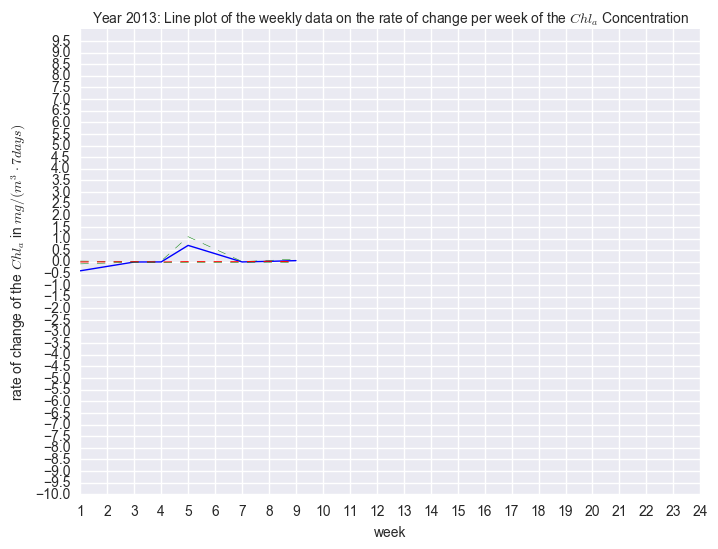

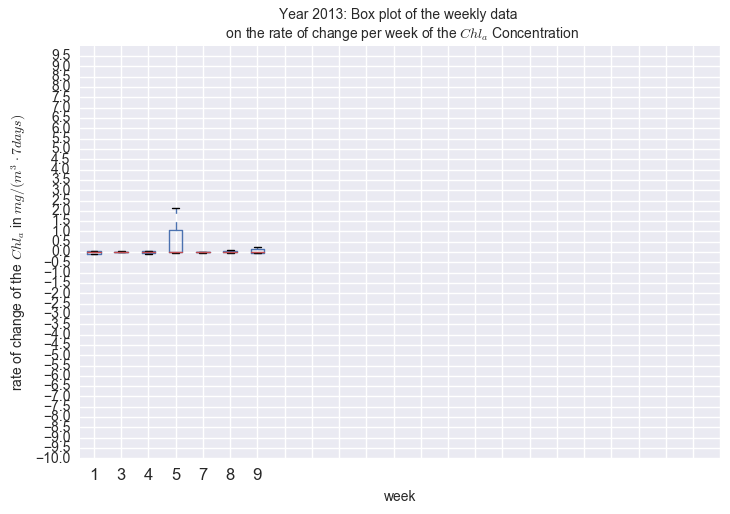


 summary statistics of chl_rate_week for the year 2014 

count    167.000000
mean       0.001740
std        1.298966
min       -5.647196
25%       -0.096312
50%       -0.003998
75%        0.038336
max        8.617970
Name: chl_rate_week, dtype: float64


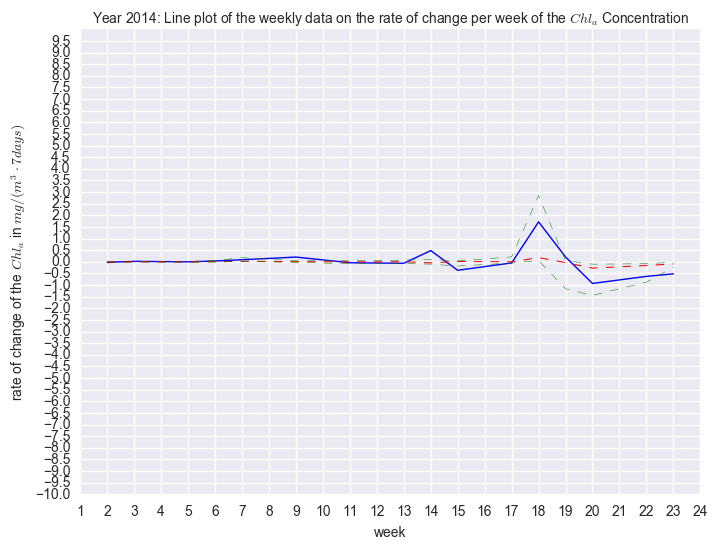

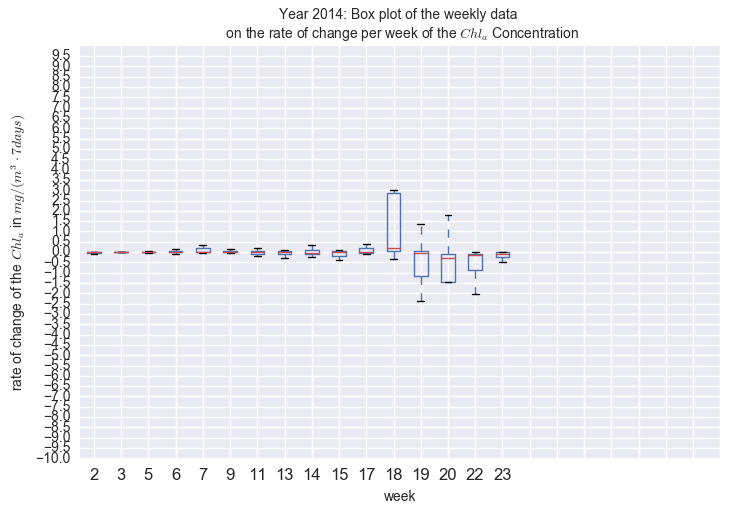


 summary statistics of chl_rate_week for the year 2015 

count    91.000000
mean      0.024364
std       4.119276
min     -29.163268
25%      -0.031331
50%       0.001791
75%       0.059764
max      23.748404
Name: chl_rate_week, dtype: float64


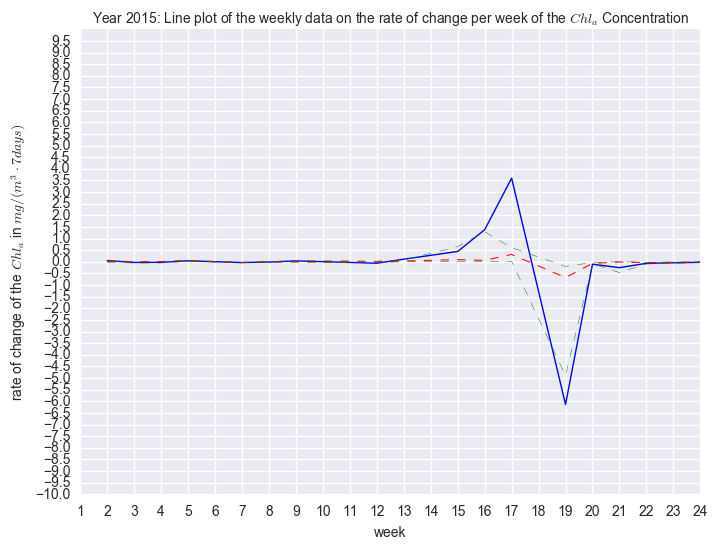

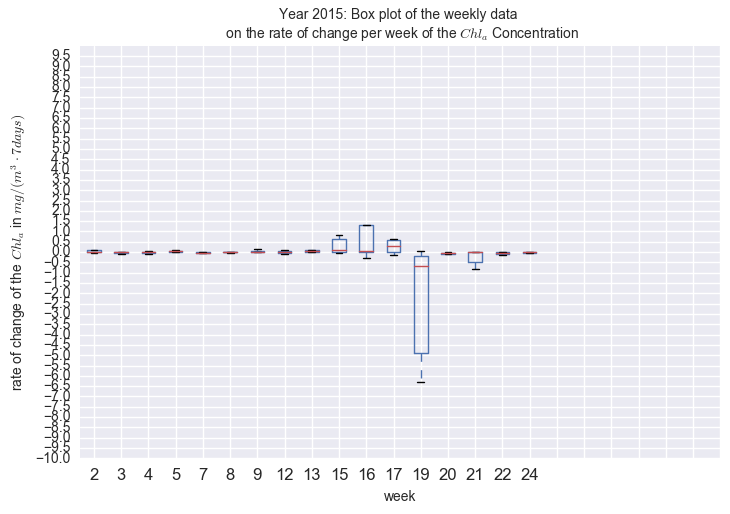


 summary statistics of chl_rate_week for the year 2016 

count    42.000000
mean     -0.007381
std       0.334824
min      -1.350632
25%      -0.021208
50%      -0.003700
75%       0.019609
max       1.537969
Name: chl_rate_week, dtype: float64


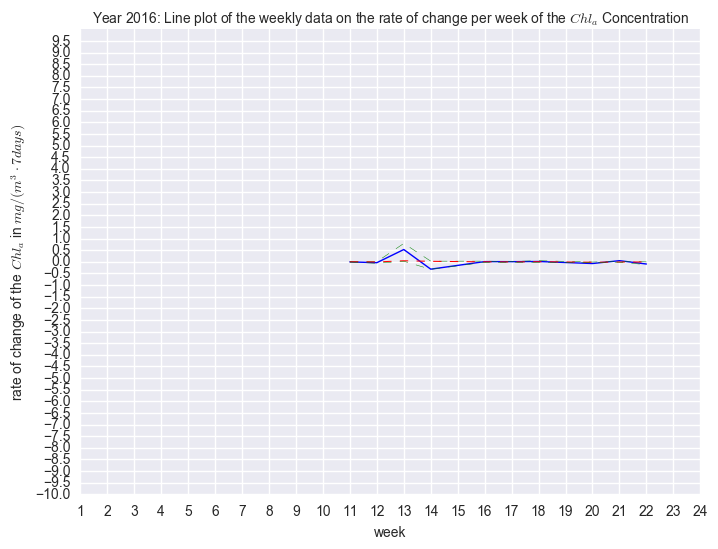

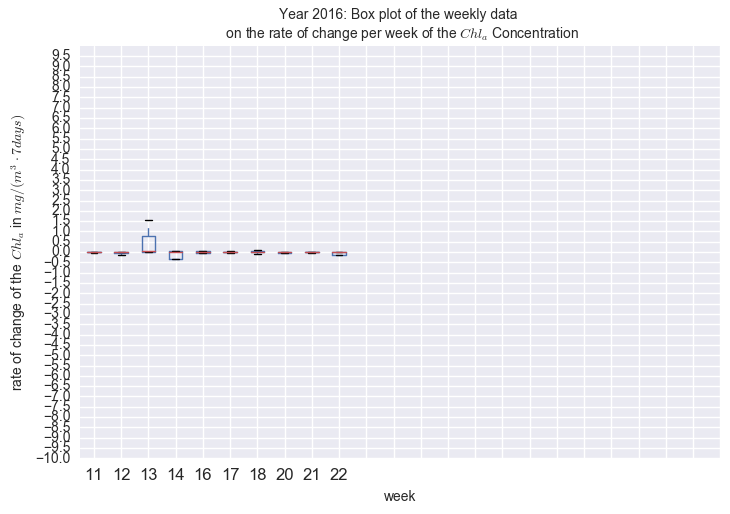

In [4]:
# [print(i) for i in range(year_min,year_max+1)]
# for  each year


for current_year in range(year_min, year_max+1):
    mask = df_timed.year == current_year
    df_yearly = df_timed[mask]

    print('\n summary statistics of chl_rate_week for the year %d \n' % (current_year) )
    print(df_yearly.chl_rate_week.describe())


    plt.figure(figsize=(8,6))
    axes1=df_yearly.groupby(['week_rotate'])['chl_rate_week'].mean().plot(linestyle="-",color='b', linewidth=1)
    df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
    df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
    df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
    axes1.set_ylim(-10, 10)
    axes1.set_title("Year " + str(current_year) + ": Line plot of the weekly data on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.xlabel('week', fontsize=10)
    plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 \cdot 7days)$', fontsize=10)
    plt.yticks(np.arange(-10, 10, 0.5))
    plt.xticks(np.arange(1, 25, 1))
    plt.show()
    plt.close()


    # http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
    #http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
    plt.figure(figsize=(8,6))
    axes2 = df_yearly.boxplot(column='chl_rate_week', by='week_rotate')
    axes2.set_ylim(-10, 10)
    #axes2.set_title("Box plot of the weekly data \n on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.title("Year " + str(current_year) + ": Box plot of the weekly data \n on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.suptitle("") # remove auto-title
    plt.xlabel('week', fontsize=10)
    plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 \cdot 7days)$', fontsize=10)
    plt.yticks(np.arange(-10, 10, 0.5))
    plt.xticks(np.arange(1, 25, 1))
    plt.show()
    plt.close()
    # the rate of change is slower on the regular scale

#matplotlib.pyplot.close("all")
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()